In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
data_food = pd.read_csv("DataFood.csv")
data_country = pd.read_csv("DataCountry.csv")

In [3]:
data_food.shape

(25416, 18)

In [4]:
data_country.shape

(214, 12)

In [5]:
# Before Processing
data_food.head()

,m49_code,country,region,cpc_code,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity,food_supply_stage,treatment,cause_of_loss,sample_size,method_data_collection,reference,url,notes
0,104,Myanmar,NaN,23161.02,"Rice, milled",2015,1.78,1.78%,26.12kgs,Storage,Storage,"30 days storage, with trapping",Rodents,NaN,Controlled Experiment,"Dr Steven Belmain (2015), context post-harvest...",NaN,Reference has been generated automatically
1,104,Myanmar,NaN,23161.02,"Rice, milled",2015,11.77,11.77%,88.18kgs,Storage,Storage,"60 days storage, no trapping",Rodents,NaN,Controlled Experiment,"Dr Steven Belmain (2015), context post-harvest...",NaN,Reference has been generated automatically
2,104,Myanmar,NaN,23161.02,"Rice, milled",2015,5.88,5.88%,44.09kgs,Storage,Storage,"30 days storage, no trapping",Rodents,NaN,Controlled Experiment,"Dr Steven Belmain (2015), context post-harvest...",NaN,Reference has been generated automatically
3,104,Myanmar,NaN,23161.02,"Rice, milled",2015,3.57,3.57%,52.24kgs,Storage,Storage,"60 days storage, with trapping",Rodents,NaN,Controlled Experiment,"Dr Steven Belmain (2015), context post-harvest...",NaN,Reference has been generated automatically
4,104,Myanmar,NaN,23161.02,"Rice, milled",2015,17.65,17.65%,132.27kgs,Storage,Storage,"90 days storage, no trapping",Rodents,NaN,Controlled Experiment,"Dr Steven Belmain (2015), context post-harvest...",NaN,Reference has been generated automatically


In [6]:
data_food = data_food.drop(columns=['reference', 'url', 'notes','country'])

In [7]:
data_food.dtypes

m49_code                      int64
region                       object
cpc_code                     object
commodity                    object
year                          int64
loss_percentage             float64
loss_percentage_original     object
loss_quantity                object
activity                     object
food_supply_stage            object
treatment                    object
cause_of_loss                object
sample_size                  object
method_data_collection       object
dtype: object

In [8]:
data_food.shape

(25416, 14)

In [9]:
# Before Processing
data_country.head()

,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source
0,Afghanistan,126,82,3109153,16,594982,28,1051783,Very Low Confidence,4,Southern Asia,https://www.unep.org/resources/report/unep-foo...
1,Albania,127,83,238492,16,45058,28,79651,Very Low Confidence,8,Southern Europe,https://www.unep.org/resources/report/unep-foo...
2,Algeria,135,91,3918529,16,673360,28,1190335,Very Low Confidence,12,Northern Africa,https://www.unep.org/resources/report/unep-foo...
3,Andorra,123,84,6497,13,988,26,1971,Low Confidence,20,Southern Europe,https://www.unep.org/resources/report/unep-foo...
4,Angola,144,100,3169523,16,497755,28,879908,Very Low Confidence,24,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...


In [10]:
data_country = data_country.drop(columns=['Source', 'Household estimate (kg/capita/year)','Retail estimate (kg/capita/year)','Food service estimate (kg/capita/year)'])
data_country['combined figures (tonnes/year)'] = data_country['Household estimate (tonnes/year)'] + data_country['Retail estimate (tonnes/year)'] + data_country['Food service estimate (tonnes/year)'] 
data_country = data_country.drop(columns=['Household estimate (tonnes/year)', 'Retail estimate (tonnes/year)', 'Food service estimate (tonnes/year)'])
data_country = data_country.rename(columns={"M49 code":"m49_code", 
                                            "combined figures (kg/capita/year)":"total_kg/capita/year", 
                                            "Confidence in estimate": "conf_in_estimate"

                                            })


In [11]:
data_country.head()

,Country,total_kg/capita/year,conf_in_estimate,m49_code,Region,combined figures (tonnes/year)
0,Afghanistan,126,Very Low Confidence,4,Southern Asia,4755918
1,Albania,127,Very Low Confidence,8,Southern Europe,363201
2,Algeria,135,Very Low Confidence,12,Northern Africa,5782224
3,Andorra,123,Low Confidence,20,Southern Europe,9456
4,Angola,144,Very Low Confidence,24,Sub-Saharan Africa,4547186


In [12]:
data_country.dtypes

Country                           object
total_kg/capita/year               int64
conf_in_estimate                  object
m49_code                           int64
Region                            object
combined figures (tonnes/year)     int64
dtype: object

In [13]:
# Merged data
data_food_country = pd.merge(data_food,data_country, on='m49_code')
data_food_country = data_food_country.drop(columns=['m49_code','sample_size','region','cause_of_loss','treatment','activity','method_data_collection','total_kg/capita/year','loss_quantity', 'Country'])
data_food_country = data_food_country.dropna(subset=['food_supply_stage'])

In [14]:
data_food_country.head()

,cpc_code,commodity,year,loss_percentage,loss_percentage_original,food_supply_stage,conf_in_estimate,Region,combined figures (tonnes/year)
0,23161.02,"Rice, milled",2015,1.78,1.78%,Storage,Very Low Confidence,South-eastern Asia,7005658
1,23161.02,"Rice, milled",2015,11.77,11.77%,Storage,Very Low Confidence,South-eastern Asia,7005658
2,23161.02,"Rice, milled",2015,5.88,5.88%,Storage,Very Low Confidence,South-eastern Asia,7005658
3,23161.02,"Rice, milled",2015,3.57,3.57%,Storage,Very Low Confidence,South-eastern Asia,7005658
4,23161.02,"Rice, milled",2015,17.65,17.65%,Storage,Very Low Confidence,South-eastern Asia,7005658


In [15]:
data_food_country.shape

(21956, 9)

In [16]:
data_food_country = data_food_country.rename(columns={"Region":"region"})


In [17]:
# Some data were lost because rows do not match
data_food_country.shape

(21956, 9)

In [18]:
print(data_food_country.loc[:, data_food_country.isnull().any()])

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 44, 45, 46, 47, 49, 50, 51, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 66, 67, 69, 70, 71, 72, 73, 75, 76, 77, 79, 80, 82, 83, 84, 86, 87, 88, 89, 90, 92, 93, 94, 96, 97, 98, 99, 101, 102, 103, 105, 106, 108, 109, 110, 111, 112, 113, 115, 116, 117, 119, 120, 121, 123, 124, 125, ...]

[21956 rows x 0 columns]


In [28]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.special import expit

In [20]:
target_name = 'food_supply_stage'
target = data_food_country[target_name]
data = data_food_country.drop(columns=[target_name])




numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)



categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

preprocessor = ColumnTransformer(
    [
        ("one-hot-encoder", categorical_preprocessor, categorical_columns),
        ("standard_scaler", numerical_preprocessor, numerical_columns),
    ]
)



In [21]:

numerical_columns

['year', 'loss_percentage', 'combined figures (tonnes/year)']

In [22]:

categorical_columns


['cpc_code',
 'commodity',
 'loss_percentage_original',
 'conf_in_estimate',
 'region']

In [23]:
from sklearn.linear_model import LogisticRegression

data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=42
)
model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))
_ = model.fit(data_train, target_train)
model.score(data_test, target_test)

0.8172709054472581

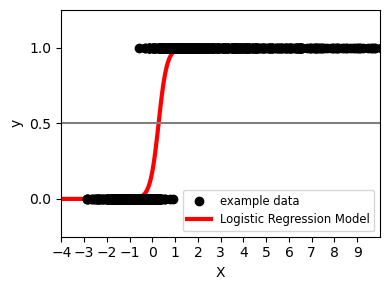

In [34]:
# Generate data for plotting logistic regression curve

xmin, xmax = -10, 10
n_samples = 1000
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(float)
X[X > 0] *= 4
X += 0.3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]

# Fit the classifier
clf = LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, label="example data", color="black", zorder=20)
X_test = np.linspace(-5, 10, 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, label="Logistic Regression Model", color="red", linewidth=3)


plt.axhline(0.5, color=".5")

plt.ylabel("y")
plt.xlabel("X")
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-0.25, 1.25)
plt.xlim(-4, 10)
plt.legend(
    loc="lower right",
    fontsize="small",
)
plt.tight_layout()
plt.show()

In [44]:

from sklearn.ensemble import RandomForestClassifier

model = make_pipeline(preprocessor, RandomForestClassifier(max_depth=2, random_state=0))
_ = model.fit(data_train, target_train)
model.score(data_test, target_test)



0.44306795408999816

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = make_pipeline(preprocessor,GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0) )
_ = model.fit(data_train, target_train)
model.score(data_test, target_test)



In [35]:
from sklearn.neighbors import KNeighborsClassifier
model = make_pipeline(preprocessor, KNeighborsClassifier(n_neighbors=3))
_ = model.fit(data_train, target_train)
model.predict(data_test)
model.score(data_test, target_test)

0.8354891601384588

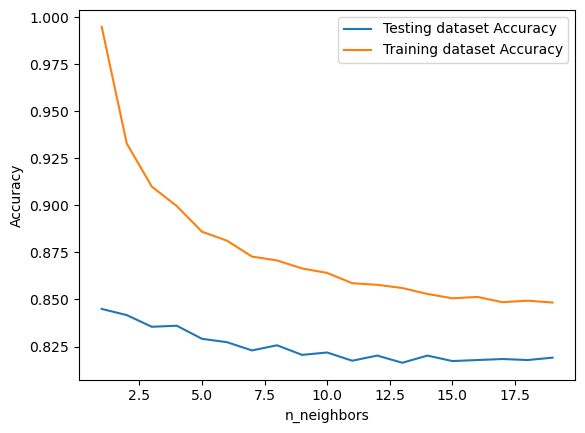

In [47]:
neighbors = np.arange(1,20)
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 

# Loop over K values 
for i, k in enumerate(neighbors): 
    model = make_pipeline(preprocessor, KNeighborsClassifier(k))
    _ = model.fit(data_train, target_train)
    model.predict(data_test)
    train_accuracy[i] = model.score(data_train, target_train)
    test_accuracy[i] = model.score(data_test, target_test)
      
    # Compute training and test data accuracy 
    #train_accuracy[i] = knn.score(data_train, target_train) 
    #test_accuracy[i] = knn.score(data_test, target_test) 

# Generate plot 
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show() 